In [1]:
#CREAR UN INDEX PARA ALMACENAR LOS DATOS
from elasticsearch import Elasticsearch
from pprint import pprint

es = Elasticsearch()

if not(es.indices.exists(index="tp5-championstweet2")):
    res = es.indices.create(index="tp5-championstweet2")  
    pprint(res)

In [2]:
#LISTAR LOS ARCHIVOS DEL DATASET
import json
import os
files = os.listdir("Dataset")
pprint(len(files))

354586


In [4]:
from elasticsearch import helpers

#CARGAR LOS DATOS EN ELASTICSEARCH
tweets=[]

for filename in files:
    with open('Dataset/'+filename) as f:
        try:
            #pprint(filename+':')
            tweet = json.load(f)
            #pprint(tweet)
            timestamp=int(tweet["timestamp_ms"])
            
            simple_tweet = {"date":tweet["created_at"], \
                            "timestamp":timestamp, \
               "text": tweet['text'], \
               "username": tweet['user']['name'], \
               "location": tweet['user']['location']}
        except KeyError:
            error="error"
            
    tweets.append(simple_tweet)
    
    #CARGAMOS LOS DATOS EN ELASTICSEARCH CON CONSULTAS 'BULK' PARA OPTIMIZAR EL PROCESO
    if (len(tweets)>=1000):
        i=0
        docs_as_string="["
        while i<1000:
            if i!=0:
                docs_as_string = docs_as_string + ','
            docs_as_string = docs_as_string + '\n' + json.dumps(tweets[i])
            i=i+1
        docs_as_string=docs_as_string+"]"
        res = helpers.bulk(es, json.loads(docs_as_string),index="tp5-championstweet2", doc_type="_doc")
        tweets=[]


POST http://localhost:9200/tp5-championstweet2/_doc/_bulk [status:N/A request:10.792s]
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/urllib3/connectionpool.py", line 387, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/usr/lib/python3/dist-packages/urllib3/connectionpool.py", line 383, in _make_request
    httplib_response = conn.getresponse()
  File "/usr/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/usr/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/loca

ConnectionTimeout: ConnectionTimeout caused by - ReadTimeoutError(HTTPConnectionPool(host='localhost', port=9200): Read timed out. (read timeout=10))

In [3]:
#CONSULTA BÁSICA A ELASTICSEARCH PARA PROBAR
res = es.search(index="tp5-championstweet2", body={"query": {"match_all":{}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print(hit)

Got 215000 Hits:
{'_index': 'tp5-championstweet2', '_type': '_doc', '_id': 'GiEWgWQBZ1q7ju9-JWah', '_score': 1.0, '_source': {'date': 'Sat May 26 20:40:19 +0000 2018', 'timestamp': 1527367219696, 'text': 'RT @KnoxTainment: RT I you are happy that Real Madrid are the Champions of Europe once again..\n\n#UCLfinal #UCLFinal2018', 'username': 'Deji Adegun', 'location': 'Abuja, Nigeria'}}
{'_index': 'tp5-championstweet2', '_type': '_doc', '_id': 'JSEWgWQBZ1q7ju9-JWah', '_score': 1.0, '_source': {'date': 'Sat May 26 19:03:46 +0000 2018', 'timestamp': 1527361426282, 'text': 'RT @BrianWainyae: This is a tough one eh! 👀 #UCLfinal', 'username': 'Lyanna Mormont', 'location': 'Zambia'}}
{'_index': 'tp5-championstweet2', '_type': '_doc', '_id': 'JiEWgWQBZ1q7ju9-JWah', '_score': 1.0, '_source': {'date': 'Sat May 26 20:41:22 +0000 2018', 'timestamp': 1527367282758, 'text': 'Real madrid third consecutive ucl champion 🙌💪😎 #UCLfinal #HalaMadrid #APorLa13', 'username': 'Hala Madrid', 'location': 'near fo

### 1) ¿Cuántos tweets tienen la palabra "liverpool"? ¿Cómo se distribuye los tweets en el tiempo (ver en un histograma)

In [42]:
res = es.search(index="tp5-championstweet2",
               body={
                   "query": {
                       "term":{
                           "text":"liverpool"
                       }
                   },
                   "aggs" : {
                       "tweets_over_time":{
                           "date_histogram":{
                               "field" :"timestamp",
                               "interval" : "1m"
                           }
                       }
                   }
               }) 
res

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 5, 'total': 5},
 'aggregations': {'tweets_over_time': {'buckets': [{'doc_count': 36,
     'key': 1527360300000},
    {'doc_count': 285, 'key': 1527360360000},
    {'doc_count': 281, 'key': 1527360420000},
    {'doc_count': 287, 'key': 1527360480000},
    {'doc_count': 262, 'key': 1527360540000},
    {'doc_count': 327, 'key': 1527360600000},
    {'doc_count': 253, 'key': 1527360660000},
    {'doc_count': 268, 'key': 1527360720000},
    {'doc_count': 359, 'key': 1527360780000},
    {'doc_count': 356, 'key': 1527360840000},
    {'doc_count': 314, 'key': 1527360900000},
    {'doc_count': 317, 'key': 1527360960000},
    {'doc_count': 257, 'key': 1527361020000},
    {'doc_count': 215, 'key': 1527361080000},
    {'doc_count': 253, 'key': 1527361140000},
    {'doc_count': 340, 'key': 1527361200000},
    {'doc_count': 343, 'key': 1527361260000},
    {'doc_count': 289, 'key': 1527361320000},
    {'doc_count': 255, 'key': 1527361380000},
    {

In [11]:
import pandas as pd

df_liverpoolByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_liverpoolByMinutes = df_liverpoolByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
df_liverpoolByMinutes[:10]

,nb_tweets,timestamp
0,36,1527360300000
1,285,1527360360000
2,281,1527360420000
3,287,1527360480000
4,262,1527360540000
5,327,1527360600000
6,253,1527360660000
7,268,1527360720000
8,359,1527360780000
9,356,1527360840000


In [12]:
df_liverpoolByMinutes = df_liverpoolByMinutes.drop(df_liverpoolByMinutes[df_liverpoolByMinutes.timestamp < 1527357600000 ].index)
df_liverpoolByMinutes[:10]

,nb_tweets,timestamp
0,36,1527360300000
1,285,1527360360000
2,281,1527360420000
3,287,1527360480000
4,262,1527360540000
5,327,1527360600000
6,253,1527360660000
7,268,1527360720000
8,359,1527360780000
9,356,1527360840000


In [18]:
import datetime

def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

df_liverpoolByMinutes['timestamp']=df_liverpoolByMinutes['timestamp'].apply(timestamp2date)
df_liverpoolByMinutes[:10]

,nb_tweets,timestamp
0,36,14:45:00
1,285,14:46:00
2,281,14:47:00
3,287,14:48:00
4,262,14:49:00
5,327,14:50:00
6,253,14:51:00
7,268,14:52:00
8,359,14:53:00
9,356,14:54:00


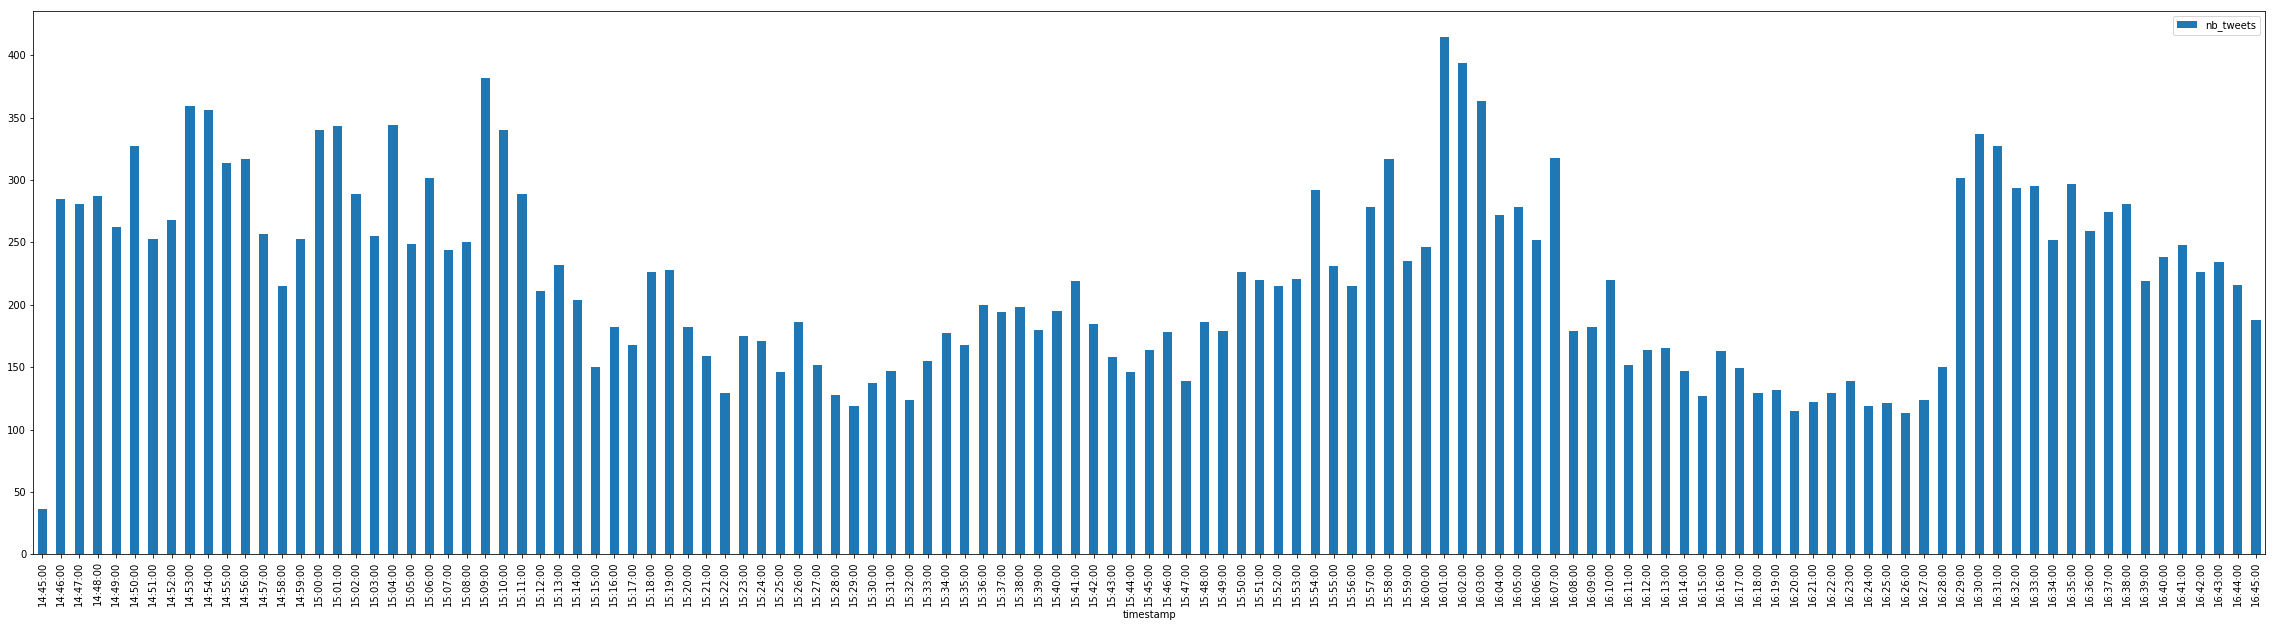

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

df_liverpoolByMinutes.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

### 2) ¿De dónde vienen los tweets? (utilizar el campo 'location')

In [21]:
res = es.search(index="tp5-championstweet2",
               body=
{
    "aggs" : {
        "distinct_location" : {
            "terms" : {
              "field" : "location.keyword",
                "size" : 354000
            }
        }
    }
})


In [23]:
df_location = pd.DataFrame(res['aggregations']['distinct_location']['buckets'])
df_location = df_location.rename(columns={'key': 'location', 'doc_count': 'n_tweets'})
df_location[:10]

,n_tweets,location
0,2151,"Lagos, Nigeria"
1,1589,Nigeria
2,1128,"London, England"
3,1015,"Nairobi, Kenya"
4,1013,South Africa
5,822,"Johannesburg, South Africa"
6,737,London
7,634,United Kingdom
8,601,Brasil
9,573,"Rio de Janeiro, Brasil"


### 3) ¿Cuántos tweets tienen las palabras "liverpool" y "goal"? (ver en un histograma)

In [53]:
res = es.search(index="tp5-championstweet2", body={"query": {"bool" : {"must" : [{ "term" : { "text" : "liverpool" } },
                                            { "term" : { "text" : "goal" } }]}}})
print("hay un total de %d tweets que contienen las palabras liverpool y goal" % res['hits']['total'])
#for hit in res['hits']['hits']:
#    print(hit)

hay un total de 986 tweets que contienen las palabras liverpool y goal


### 4) Graficar un Pie Chart comparando el número de tweets con: 
a) la palabra 'liverpool', b) la palabra 'madrid', c) la palabra 'madrid' y 'liverpool' d) ninguna de las palabras

In [80]:
res1 = es.search(index="tp5-championstweet2", body={"query": { "term" : { "text" : "liverpool" }}})
res2 = es.search(index="tp5-championstweet2", body={"query": { "term" : { "text" : "madrid" }}})
res3 = es.search(index="tp5-championstweet2", body={"query": {
    "bool" : {
        "must" : [
            { "term" : { "text" : "liverpool" } },
            { "term" : { "text" : "madrid" } }
        ]}
    }
                                                  })
res4 = es.search(index="tp5-championstweet2", body={"query": {
    "bool" : {
        "must_not" : [
            { "term" : { "text" : "liverpool" } },
            { "term" : { "text" : "madrid" } }
        ]}
    }
                                                   })

In [81]:
liv = res1['hits']['total']
mad = res2['hits']['total']
amb = res3['hits']['total']
nin = res4['hits']['total']

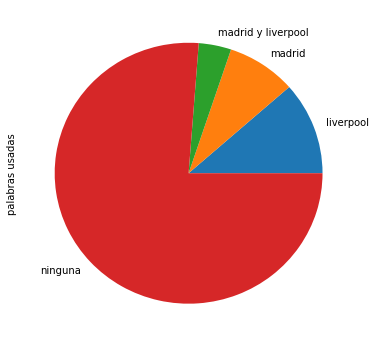

In [82]:
palabras = ['liverpool', 'madrid', 'madrid y liverpool', 'ninguna']
series = pd.Series([liv, mad, amb, nin], 
                   index=palabras, 
                   name='palabras usadas')
series.plot.pie(figsize=(6, 6))

### 5) ¿Cuáles son los emoticons más frecuentes? A partir de las visualizaciones disponibles en las librerias MatplotLib y/o Seaborn (seaborn.pydata.org), proponer una visualización para observar las emociones expresadas durante el partido. 

Primero haria un query para filtrar los tweets que tienen un emogy con cara feliz en el campo texto y los guardaria en un df de felicidad y haria lo mismo para los tweets que tengan cara de enojo o tristeza, los guardaria en otro df.